# Homicide Prediction
Jason Yeoh

### (1) Import libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Model building libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

### (2) Load datasets
Load the following datasets:
- **Socioeconomic** indicators (primary)
- **Women Empowerment** indicators (secondary 1)
- **Educational** indicators (secondary 2)

In [41]:
primary = pd.read_csv('final_primary.csv')
secondary1 = pd.read_csv('final_secondary1.csv')
secondary2 = pd.read_csv('final_secondary2.csv')

### (3) Descriptive Statistics

In [42]:
print('Size of primary data: {}'.format(primary.shape))
print('Size of secondary1 data: {}'.format(secondary1.shape))
print('Size of secondary2 data: {}'.format(secondary2.shape))

Size of primary data: (196, 11)
Size of secondary1 data: (116, 6)
Size of secondary2 data: (196, 9)


#### SOCIOECONOMIC DATA (196 entries, 11 attributes)
The primary data consists of the following attributes:
- **poverty_gap**: The poverty gap index is the mean shortfall in income or consumption from the International Poverty Line ($1.90) counting the non-poor as having zero shortfall, expressed as a percentage of the poverty line.
- **public_health_exp**: Public health expenditure includes: recurrent and capital spending (central and local
levels), external borrowing and grants (including donations from international
agencies and NGOs), and social or compulsory insurance funds
- **malnutrition_death_rates**: Protein-energy malnutrition (PEM) death rate, measured per 100,000 individuals
- **infant_mortality_rate**: The share of newborns who die before reaching one year of age.
- **GDP_per_capita**
- **annual_health_exp**
- **homicide_rate**: Homicides per 100,000 people

In [43]:
primary.head()

,Unnamed: 0,Country,Country_Code,Year,poverty_gap,public_health_exp,malnutrition_death_rates,Infant_mortality_rate,GDP_per_capita,annual_health_care_per_capita,homicide_Rate
0,1,Afghanistan,AFG,2012,61504781.25,2.920566,3.390730,6.09,1839.273579,160.368027,11.445933
1,2,Albania,ALB,2012,4424530.00,2.735704,0.167334,0.95,10369.823380,544.006172,2.481095
2,3,Algeria,DZA,2012,61504781.25,4.520251,0.298914,2.24,13161.961670,821.338885,1.229986
3,4,American Samoa,ASM,2012,61504781.25,3.325882,5.616784,1.70,10404.224090,636.353009,5.083770
4,6,Andorra,AND,2012,61504781.25,5.747040,0.083869,0.37,10404.224090,3426.500209,0.755515


#### WOMEN EMPOWERMENT DATA (116 entries, 6 attributes)
- **youth_literacy_female**
- **women_in_parliaments**
- **firms_with_female_top_manager**

In [44]:
secondary1.head()

,Code,youth_literacy_female,Women_in_parlements,Firms_with_female_top_manager,Year,Entity
0,AFG,11.142800,27.7,0.7,2012,Afghanistan
1,AGO,63.182121,34.1,13.5,2012,Angola
2,ALB,99.020187,15.7,11.7,2012,Albania
3,ARG,97.302483,37.4,9.2,2012,Argentina
4,ARM,99.910568,10.7,13.5,2012,Armenia


In [45]:
secondary2.head()

,Unnamed: 0,Code,homicide_rate,gov_expen,gross_enrol_secondary,Year,gross_enrol_primary,Country,lower_secondary
0,2,AFG,11.445933,2.524410,56.677341,2012,108.928520,Afghanistan,73.914095
1,3,AGO,3.694127,4.522714,80.807995,2012,103.133186,Angola,73.914095
2,4,ALB,2.481095,4.522714,92.741470,2012,104.784393,Albania,94.165283
3,5,AND,0.755515,4.522714,80.807995,2012,103.133186,Andorra,73.914095
4,6,ARE,1.234601,4.522714,80.807995,2012,101.423203,United Arab Emirates,73.914095


In [47]:
# Drop unnecessary columns
primary = primary.drop(columns=['Unnamed: 0', 'Year', 'Country', 'Country_Code'])
secondary1 = secondary1.drop(columns=['Year'])
secondary2 = secondary2.drop(columns=['Unnamed: 0', 'Year', 'homicide_rate'])

In [48]:
# Rename columns for uniformity
primary.columns = ['poverty_gap', 'public_health_exp', 'malnutrition_death_rates', 'infant_mortality_rates', 'gdp_per_capita', 'annual_health_per_capita', 'homicide_rate']
secondary1.columns = ['code', 'youth_female_literacy', 'women_in_parliaments', 'firms_w_female_top_manager', 'country']
secondary2.columns = ['code', 'gov_expenditure', 'gross_enrol_secondary', 'gross_enrol_primary', 'country', 'lower_secondary']

secondary1 = secondary1[['country', 'code', 'youth_female_literacy', 'women_in_parliaments', 'firms_w_female_top_manager']]
secondary2 = secondary2[['country', 'code', 'gov_expenditure', 'gross_enrol_secondary', 'gross_enrol_primary', 'lower_secondary']]

### (4) EDA

#### CORRELATION PLOT
We could see that **GDP per capita and infant mortality rate**

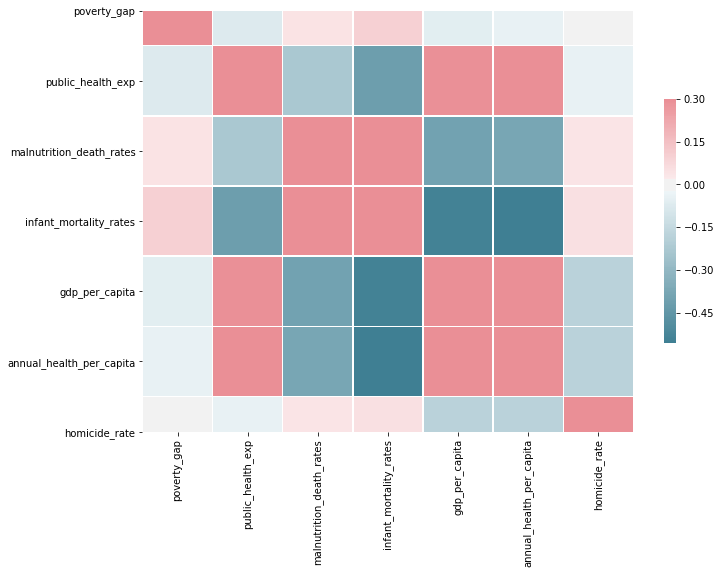

In [49]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(primary.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [50]:
c = primary.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[so>0.5]

homicide_rate             homicide_rate               1.000000
annual_health_per_capita  annual_health_per_capita    1.000000
public_health_exp         public_health_exp           1.000000
malnutrition_death_rates  malnutrition_death_rates    1.000000
gdp_per_capita            gdp_per_capita              1.000000
infant_mortality_rates    infant_mortality_rates      1.000000
poverty_gap               poverty_gap                 1.000000
gdp_per_capita            annual_health_per_capita    0.761413
annual_health_per_capita  gdp_per_capita              0.761413
infant_mortality_rates    malnutrition_death_rates    0.691949
malnutrition_death_rates  infant_mortality_rates      0.691949
public_health_exp         annual_health_per_capita    0.616443
annual_health_per_capita  public_health_exp           0.616443
                          infant_mortality_rates      0.558079
infant_mortality_rates    annual_health_per_capita    0.558079
                          gdp_per_capita              0

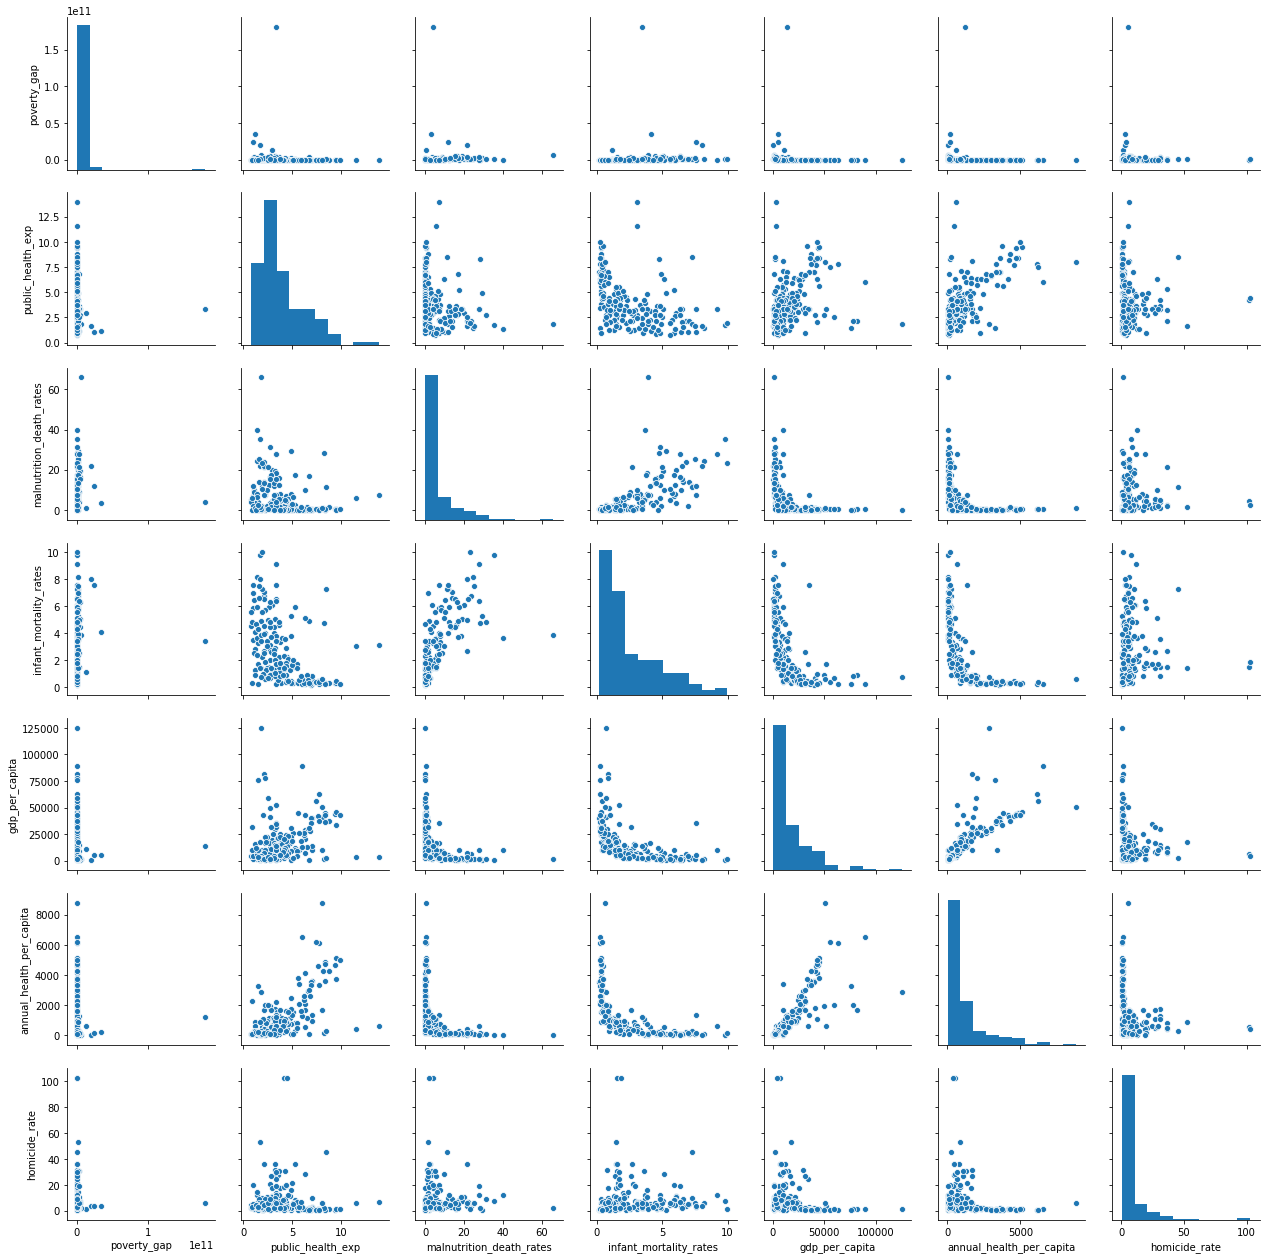

In [53]:
sns.pairplot(primary)

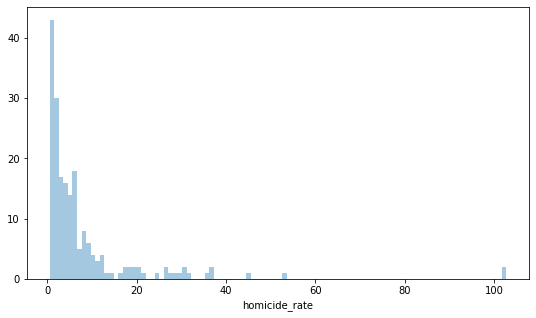

In [54]:
f, ax = plt.subplots(figsize=(9, 5))
sns.distplot(primary['homicide_rate'], kde = False, bins = 100)

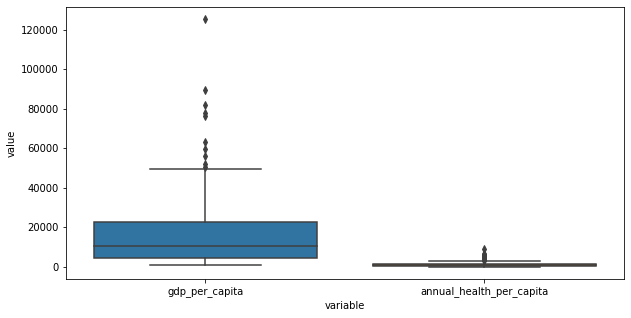

In [55]:
f, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(x=primary['country'].head(3), y=primary['gdp_per_capita'], data=primary)
sns.boxplot(x="variable", y="value", data=pd.melt(primary[['gdp_per_capita', 'annual_health_per_capita']]))

**BOXPLOTS**

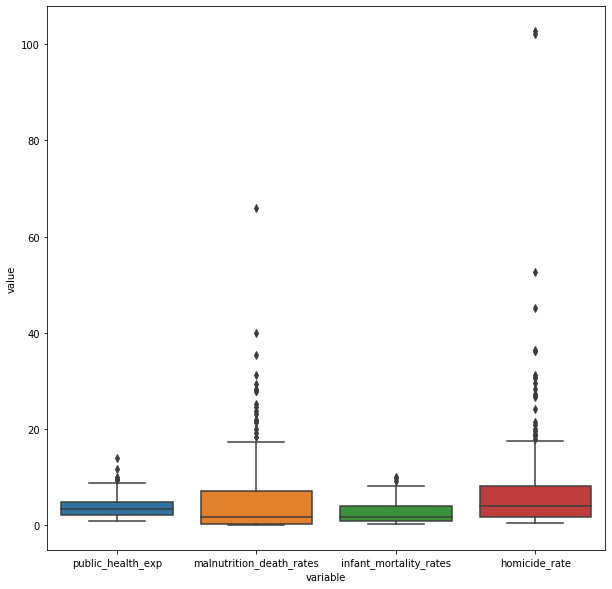

In [56]:
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(primary[['public_health_exp', 'malnutrition_death_rates', 'infant_mortality_rates', 'homicide_rate']]))

### (5) Model building without secondary data

#### LASSO REGRESSION

In [130]:
X=primary.iloc[:,:-1] ## independent features
y=primary.iloc[:,-1] ## dependent features

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

lasso = Lasso()
alphas = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, alphas, scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-132.1722194068382


In [131]:
y_pred = lasso_regressor.predict(X_test)
r2_score(y_test, y_pred)

-0.015110447564215645

#### DECISION TREE & RANDOM FORESTS

In [132]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print('Decision Tree R2 Score: {}'.format( r2_score(y_test, tree_model.predict(X_test)) ))
print('Random Forest R2 Score: {}'.format( r2_score(y_test, rf_model.predict(X_test)) ))

Decision Tree R2 Score: 0.2552261626478267
Random Forest R2 Score: 0.0070754624741953265
